Sentiment analysis on imdb dataset using LSTM engines

In [1]:
from keras.datasets import imdb

vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
X_train.shape

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step


(25000,)

Max length

In [2]:
len(max((X_train + X_test), key=len))

2697

Min length

In [3]:
len(min((X_test + X_test), key=len))

14

Pad sequences

In [4]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
X_train.shape

(25000, 500)

LSTM model

In [12]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(50))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
#for regularization
model.add(Dense(32, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 176,651
Trainable params: 176,651
Non-trainable params: 0
_________________________________________________________________


In [14]:
hist = model.fit(X_train, y_train, 
                 validation_split = 0.2,
                 verbose = 1,
                 batch_size=64,
                 epochs=5)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 400s 20ms/step - loss: 0.4406 - accuracy: 0.8177 - val_loss: 0.3856 - val_accuracy: 0.8444
Epoch 2/5
20000/20000 [==============================] - 398s 20ms/step - loss: 0.2937 - accuracy: 0.8844 - val_loss: 0.3014 - val_accuracy: 0.8752
Epoch 3/5
20000/20000 [==============================] - 401s 20ms/step - loss: 0.2348 - accuracy: 0.9117 - val_loss: 0.3073 - val_accuracy: 0.8800
Epoch 4/5
20000/20000 [==============================] - 408s 20ms/step - loss: 0.2151 - accuracy: 0.9184 - val_loss: 0.3140 - val_accuracy: 0.8806
Epoch 5/5
20000/20000 [==============================] - 408s 20ms/step - loss: 0.2139 - accuracy: 0.9182 - val_loss: 0.3391 - val_accuracy: 0.8652


In [15]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 69s 3ms/step


[0.34312869245052335, 0.8634799718856812]

graphs, loss values and accuracy values

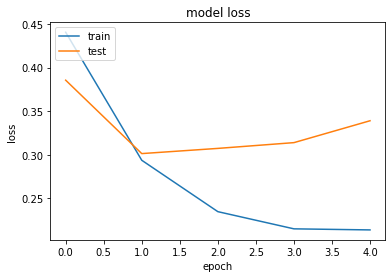

In [18]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

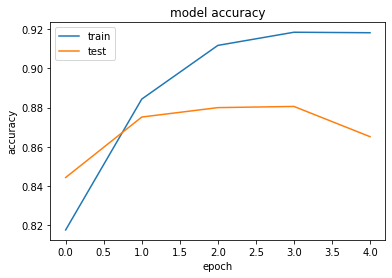

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()